In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [18]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9629629629629629

In [19]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.4111111111111111

In [20]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9703703703703703

Scores from the above list of algorithms Logistic Regression and Random Forest are doing comparatively better than SVM

Now will use cross_val_score function and get the scores, passing different algorithms with dataset and cv

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.89482471 0.95325543 0.90984975]
Avg : 0.9193099610461881


In [23]:
score_svm =cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)
print(score_svm)
print('Avg :',np.average(score_svm))

[0.38063439 0.41068447 0.51252087]
Avg : 0.4346132442960489


In [24]:
score_rf=cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)
print(score_rf)
print('Avg :',np.average(score_rf))

[0.92487479 0.94490818 0.92487479]
Avg : 0.9315525876460767


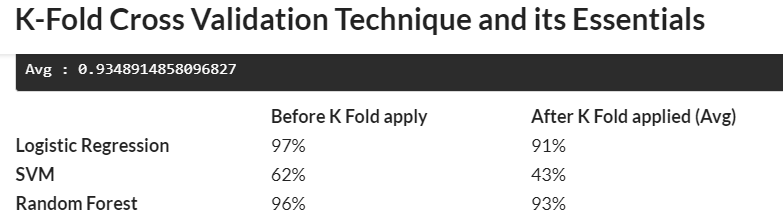

**Parameter Tuning Using K-Fold**

Let us consider the RandomForestClassifier for this analysis, and n_estimators is our parameter for this case and CV as 10 (commonly used)

In [25]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
print('Avg Score for Estimators=5 and CV=10 :',np.average(scores1))

Avg Score for Estimators=5 and CV=10 : 0.8814463066418374


In [26]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
print('Avg Score for Estimators=20 and CV=10 :',np.average(scores1))

Avg Score for Estimators=20 and CV=10 : 0.936542520173805


In [27]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
print('Avg Score for Estimators=30 and CV=10 :',np.average(scores1))

Avg Score for Estimators=30 and CV=10 : 0.9359962756052141


In [28]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
print('Avg Score for Estimators=40 and CV=10 :',np.average(scores1))

Avg Score for Estimators=40 and CV=10 : 0.9376691495965238


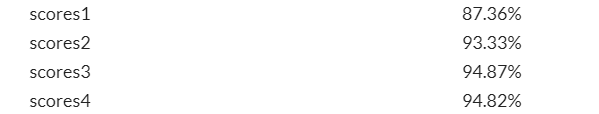

**K-Fold in Visual form**

In [32]:
X=digits.data
y=digits.target

In [33]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.9710738671632526
